In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify, implemented_function

In [2]:
def solve(N, x, a, a_0, f, uniform=True):
    if uniform:
        X = X = np.linspace(0,1,N+2)
    else:
        X = np.sort(np.random.random(size=N+2)); X[0] = 0; X[-1]=1
        
    K = np.zeros([N,N])
    F = np.zeros([N])

    for i in range(N):
        try:
            phi_i = (x - X[i+1])/(X[i+2] - X[i+1])
            phi_j = (x - X[i+2])/(X[i+1] - X[i+2])
            K[i][i+1] = K[i+1][i] = sp.integrate(a_0*phi_i*phi_j + a*sp.diff(phi_i,x)*sp.diff(phi_j,x), (x,X[i+1],X[i+2]))
        except:
            pass

        phi_i = (x - X[i])/(X[i+1] - X[i])
        K[i][i] = sp.integrate(a_0*(phi_i**2) + a*sp.diff(phi_i,x)**2, (x,X[i],X[i+1]))
        F[i] = sp.integrate((phi_i*f), (x,X[i],X[i+1]))

        phi_i = (x - X[i+2])/(X[i+1] - X[i+2])
        K[i][i] += sp.integrate(a_0*(phi_i**2) + a*sp.diff(phi_i,x)**2, (x,X[i+1],X[i+2]))
        F[i] += sp.integrate((phi_i*f), (x,X[i+1],X[i+2]))
    u = np.linalg.inv(K).dot(F)
    return X, u



In [13]:
def plot(X, u, u_exact_fn, u_latex, f_latex,a_latex,a0_latex, name="temp.png"):
    
    fig,axs = plt.subplots(1,2,figsize=[12,6])
    
    U = np.zeros_like(X)
    U[1:-1] = u
    axs[0].plot(X,U,'b-x',label="FEM")
    X2 = np.linspace(0,1,100)
    axs[0].plot(X2,u_exact_fn(X2),'r--', label="Exact: $u = {}$".format(u_latex));
    axs[0].set_title("Exact solution vs. FEM \n $f={}$ \n $a(x)={}$ \t $a_0(x)={}$".format(f_latex,a_latex,a0_latex),fontsize=15)
    axs[0].legend(fontsize=12)
    axs[1].plot(X,abs(U-u_exact_fn(X)))
    axs[1].set_title("Error at points", fontsize=15)
    plt.tight_layout()
    plt.savefig(name)
    plt.show()

In [14]:
def plot_plus(N, x, a, a_0, u, uniform=True, name="temp.png"):

    a_latex = sp.latex(a)
    a0_latex = sp.latex(a_0)
    u_latex = sp.latex(u)
    f = -a*sp.diff(sp.diff(u,x),x) + a_0*u
    f_latex = sp.latex(f)
    u_exact_fn = lambdify(x,u)

    X, u = solve(N, x, a, a_0, f, uniform=uniform)

    plot(X, u, u_exact_fn, u_latex, f_latex, a_latex, a0_latex, name=name)

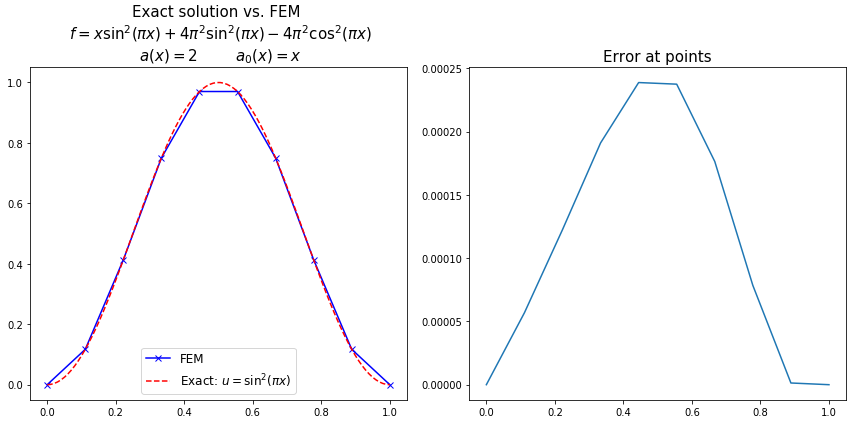

In [15]:
N   = 8
x   = sp.symbols('x')
a_0 = x
a   = 2
u = sp.sin(sp.pi*x)**2

plot_plus(N, x, a, a_0, u, uniform=True, name="one.png")

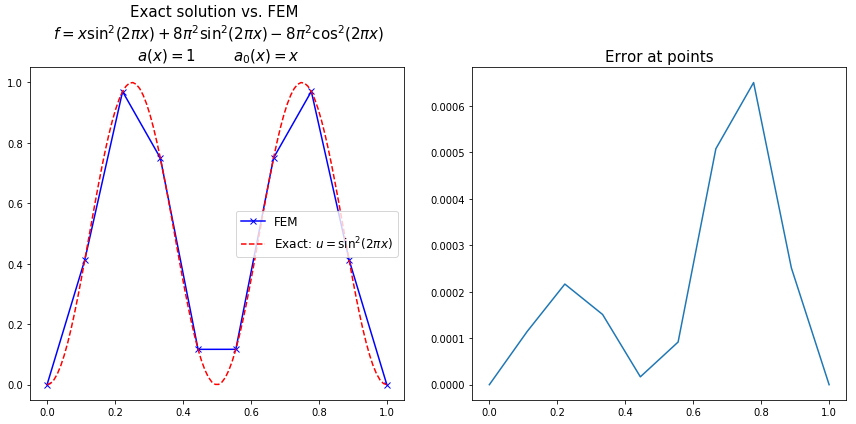

In [16]:
N   = 8
x   = sp.symbols('x')
a_0 = x
a   = 1
u = sp.sin(2*sp.pi*x)**2

plot_plus(N, x, a, a_0, u, uniform=True, name="two.png")

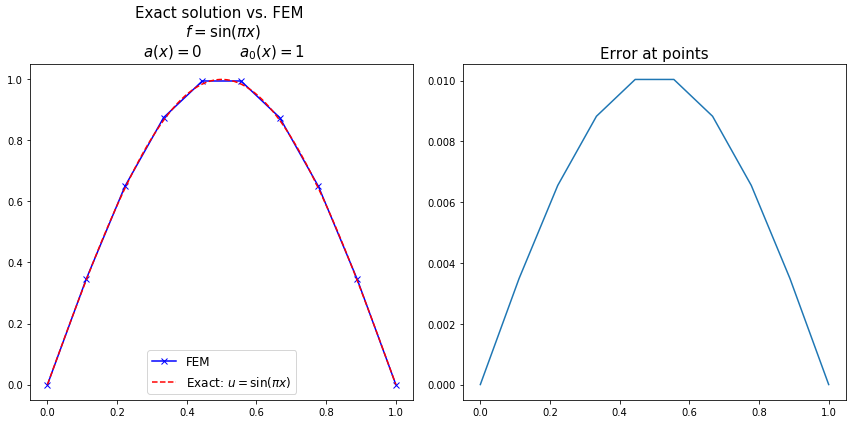

In [17]:
N   = 8
x   = sp.symbols('x')
a_0 = 1
a   = 0
u = sp.sin(sp.pi*x)

plot_plus(N, x, a, a_0, u, uniform=True, name="three.png")

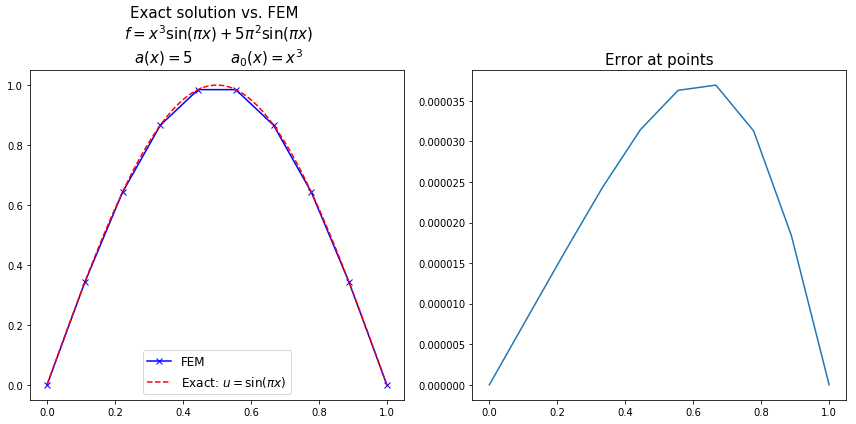

In [18]:
N   = 8
x   = sp.symbols('x')
a_0 = x**3
a   = 5
u = sp.sin(sp.pi*x)

plot_plus(N, x, a, a_0, u, uniform=True, name="four.png")

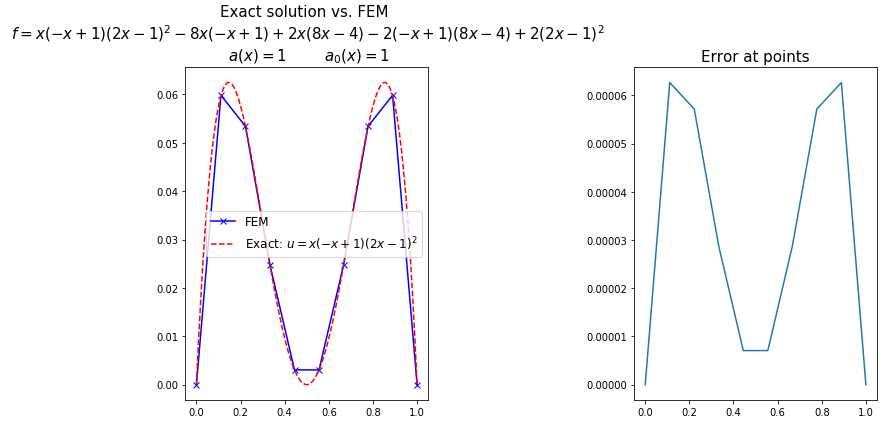

In [19]:
N   = 8
x   = sp.symbols('x')
a_0 = 1
a   = 1
u = x*(1-x)*(2*x-1)**2

plot_plus(N, x, a, a_0, u, uniform=True, name="five.png")

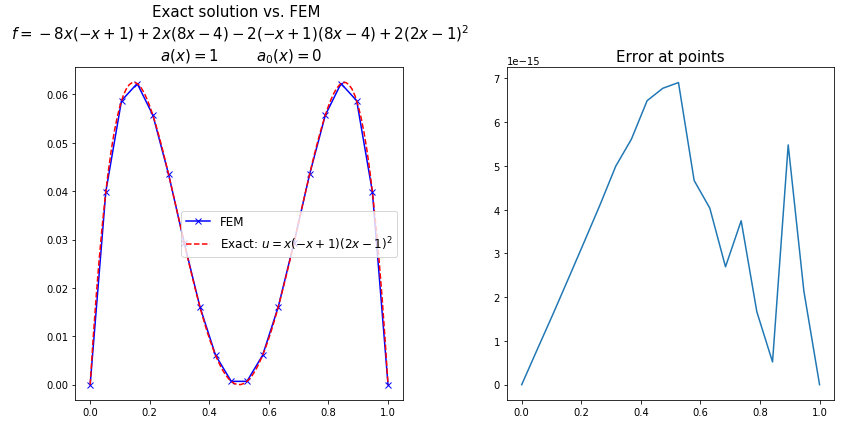

In [20]:
N   = 18
x   = sp.symbols('x')
a_0 = 0
a   = 1
u = x*(1-x)*(2*x-1)**2

plot_plus(N, x, a, a_0, u, uniform=True, name="six.png")

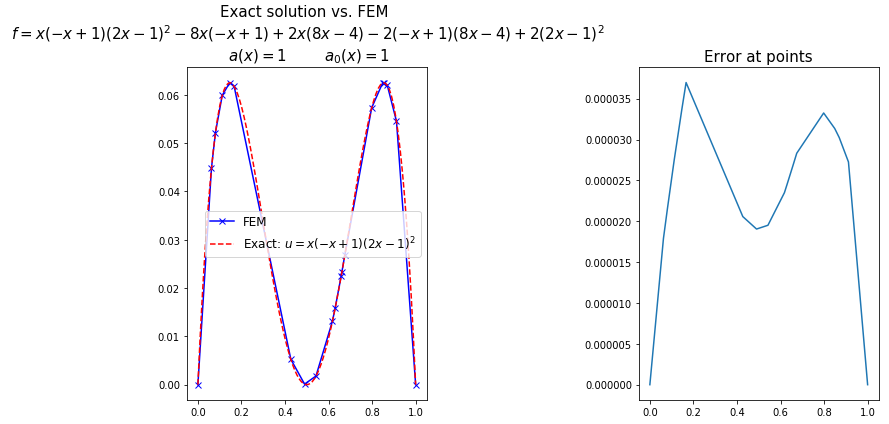

In [21]:
N   = 18
x   = sp.symbols('x')
a_0 = 1
a   = 1
u = x*(1-x)*(2*x-1)**2

plot_plus(N, x, a, a_0, u, uniform=False, name="seven.png")

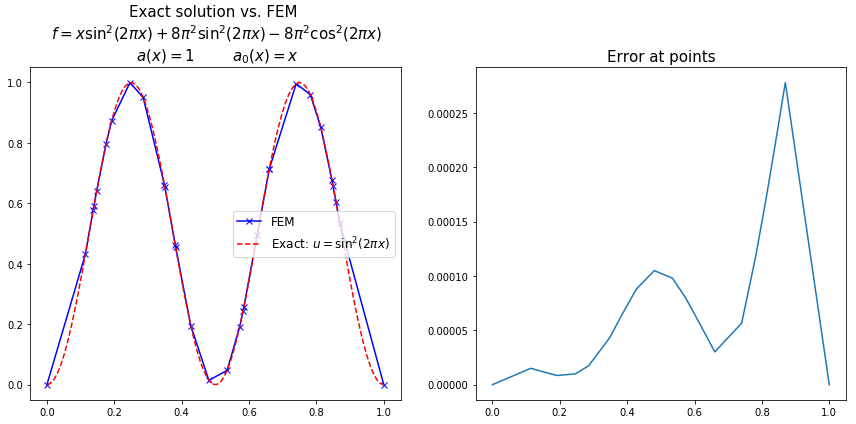

In [22]:
N   = 28
x   = sp.symbols('x')
a_0 = x
a   = 1
u = sp.sin(2*sp.pi*x)**2

plot_plus(N, x, a, a_0, u, uniform=False, name="eight.png")

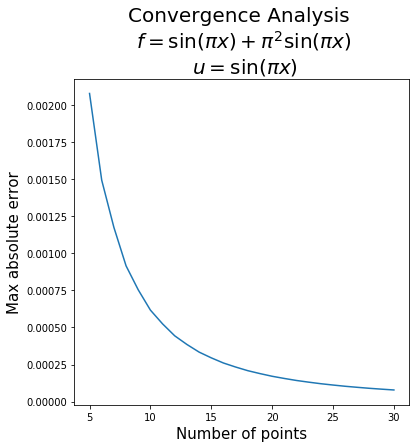

In [33]:
N_   = np.linspace(5,30,26)
errors = []

x   = sp.symbols('x')
a_0 = 1
a   = 1
u = sp.sin(sp.pi*x)

a_latex = sp.latex(a)
a0_latex = sp.latex(a_0)
u_latex = sp.latex(u)
f = -a*sp.diff(sp.diff(u,x),x) + a_0*u
f_latex = sp.latex(f)
u_exact_fn = lambdify(x,u)

for N in N_.astype(int):
    
    X, u = solve(N, x, a, a_0, f, uniform=True)
    U = np.zeros_like(X)
    U[1:-1] = u
    errors.append(np.max(abs(U-u_exact_fn(X))))

plt.figure(figsize=(6,6))
plt.plot(N_,errors)
plt.xlabel('Number of points', fontsize=15)
plt.title('Convergence Analysis \n $f = {}$ \n $u = {}$'.format(f_latex, u_latex),fontsize=20)
plt.ylabel('Max absolute error', fontsize=15)
plt.savefig('conv.png')
plt.show()

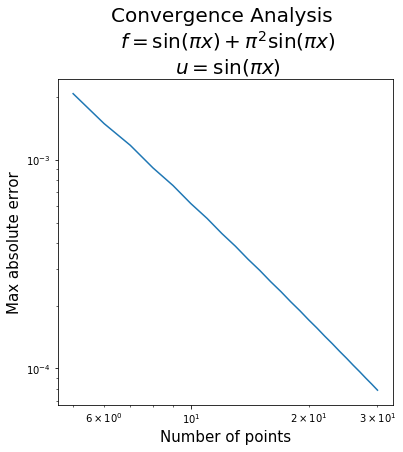

In [34]:
plt.figure(figsize=(6,6))
plt.loglog(N_,errors)
plt.xlabel('Number of points', fontsize=15)
plt.title('Convergence Analysis \n $f = {}$ \n $u = {}$'.format(f_latex, u_latex),fontsize=20)
plt.ylabel('Max absolute error', fontsize=15)
plt.savefig('conv_log.png')
plt.show()